<a href="https://colab.research.google.com/github/alehfernandez/Data-Science-II-Machine-Learning/blob/main/Proyecto_DSII_ML_Fernandez_Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Data Science: RED WHINE**

# Abstract

En este proyecto, vamos a analizar un data set sobre vinos tintos. Queremos entender qué hace que un vino sea bueno y si podemos predecir qué tan bueno será un vino basándonos en sus características. El conjunto de datos contiene información sobre cosas como la acidez, el azúcar, el alcohol y otras cosas que pueden afectar el sabor del vino. También tenemos una puntuación de calidad para cada vino, que va de 3 (no tan bueno) a 8 (muy bueno).

Al mirar los datos, vemos que la mayoría de los vinos tienen una calidad de 5 o 6. No hay muchos vinos realmente malos (3) ni realmente buenos (8). Esto nos dice que la calidad del vino depende de muchas cosas, no solo de una.

Para hacer este proyecto, vamos a seguir varios pasos. Primero, vamos a explorar los datos para ver cómo se relacionan las diferentes características con la calidad del vino. Usaremos gráficos para encontrar patrones interesantes.

Luego, vamos a usar técnicas de aprendizaje automático para crear modelos que puedan predecir la calidad del vino. Probaremos diferentes modelos para ver cuál funciona mejor.

Al final, veremos qué tan bien funcionan nuestros modelos y qué características son las más importantes para predecir la calidad del vino.

Esperamos que este proyecto nos ayude a entender mejor qué hace que un vino sea bueno. Esto podría ser útil para los productores de vino para que puedan hacer mejores vinos, y también para las personas que compran vino para que puedan elegir los mejores.

Este proyecto es solo el comienzo. En el futuro, podríamos analizar más cosas, como el tipo de uva, de dónde viene el vino y cómo se envejece, para hacer modelos aún mejores.

# Contexto comercial:

La calidad del vino es un factor crucial para el éxito comercial de las bodegas. Identificar los factores clave que determinan la calidad puede ayudar a los productores a mejorar sus vinos y aumentar su competitividad en el mercado. Además, los modelos predictivos pueden ser utilizados para estimar la calidad de los vinos antes de su lanzamiento, lo que permite tomar decisiones informadas sobre precios y estrategias de marketing.

# Contexto analítico:
El análisis exploratorio de datos (EDA) revela que la calidad del vino está influenciada por múltiples factores, siendo el alcohol, la acidez volátil y la densidad los más relevantes. El EDA también muestra que la mayoría de los vinos en el conjunto de datos tienen una calidad media, lo que indica que puede ser un desafío desarrollar un modelo predictivo altamente preciso.

# Hipótesis:

1. La acidez fija tiene una relación negativa con la calidad del vino, a mayor acidez fija, menor calidad.
2. El contenido de alcohol tiene una relación positiva con la calidad del vino, a mayor contenido de alcohol, mayor calidad.
3. Es posible construir un modelo predictivo que estime la calidad del vino con una precisión razonable utilizando las características fisicoquímicas disponibles.

In [88]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
url='https://raw.githubusercontent.com/alehfernandez/Data-Science-I/main/winequality-red.csv'
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [90]:
df.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [91]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
#No tenemos valores perdidos, los identificamos de la siguiente manera:

missing_values = df.isnull().sum()
print("Valores perdidos en cada columna:")
print(missing_values)


Valores perdidos en cada columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [94]:
#renombramos las columnas del ingles al español
df= df.rename(columns={"fixed acidity": "Acidez Fija", "volatile acidity": "Acidez Volatil", "citric acid": "Ácido cítrico",
                       "residual sugar": "Azúcar residual", "chlorides":"Cloruros", "free sulfur dioxide":"Dióxido de azufre libre",
                       "total sulfur dioxide":"Dióxido de azufre total", "density":"Densidad", "sulphates":"Sulfatos",
                       "alcohol":"Alcohol", "quality":"Calidad"})
df.head()

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Gráficos Analiticos

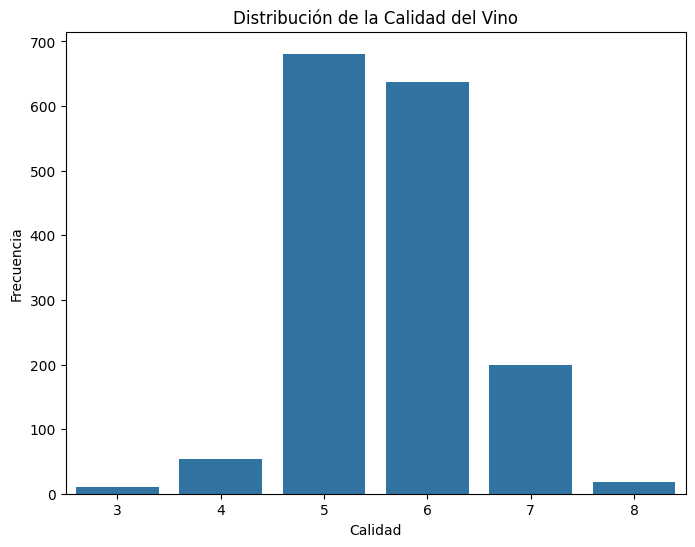

In [95]:
# Distribución de la calidad del vino

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Calidad')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

Text(0.5, 0, 'Alcohol')

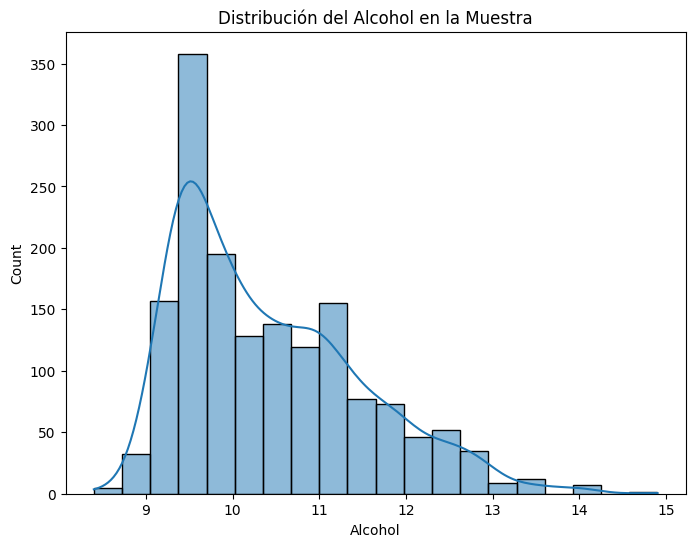

In [96]:
# Histograma del alcohol en la muestra

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Alcohol', bins=20, kde=True)
plt.title('Distribución del Alcohol en la Muestra')
plt.xlabel('Alcohol')

In [97]:
# Separamos los valores de calidad en tres categorias: Baja (entre 0 y 4), Media (entre 5 y 6) y Alta (entre 7 y 10)

bins = [0, 4, 6, 10]
labels = ['1-Baja', '2-Media', '3-Alta']
df['Rango de Calidad'] = pd.cut(df['Calidad'], bins=bins, labels=labels)
df.head()

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad,Rango de Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2-Media
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2-Media
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2-Media
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2-Media
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2-Media


# Hipótesis 1

"La acidez fija tiene una relación negativa con la calidad del vino, a mayor acidez fija, menor calidad."

Para analizar la misma utilizaremos el gráfico de densidad "Relación entre Acidez Fija y Densidad Según Calidad" muestra la distribución de la calidad del vino en función de la acidez fija.

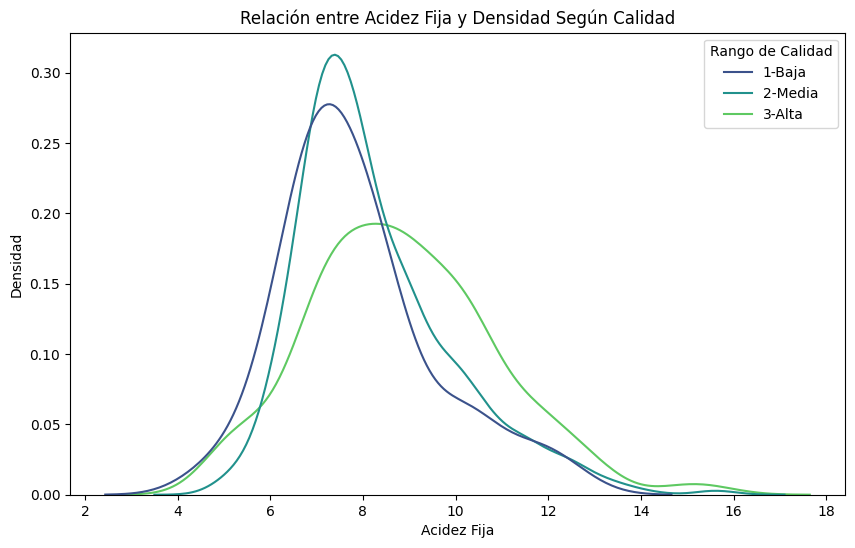

In [98]:
# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Acidez Fija', hue='Rango de Calidad', palette='viridis', common_norm=False)
plt.title('Relación entre Acidez Fija y Densidad Según Calidad')
plt.xlabel('Acidez Fija')
plt.ylabel('Densidad')
plt.show()


# Conclusiones Hipotesis 1

basándonos en el gráfico de densidad no hay una relación negativa clara entre la acidez fija y la calidad del vino, como se planteaba en la hipótesis 1. En cambio, parece haber una posible relación positiva débil, aunque la acidez fija no es el único factor que influye en la calidad.

# Hipótesis 2

"El contenido de alcohol tiene una relación positiva con la calidad del vino, a mayor contenido de alcohol, mayor calidad."

Para este análisis utilizaremos un histograma para observar la distribución de los valores de contenido de alcohol en la base de datos
y un gráfico boxplot para visualizar la relación entre el contenido de alcohol y la calidad del vino.

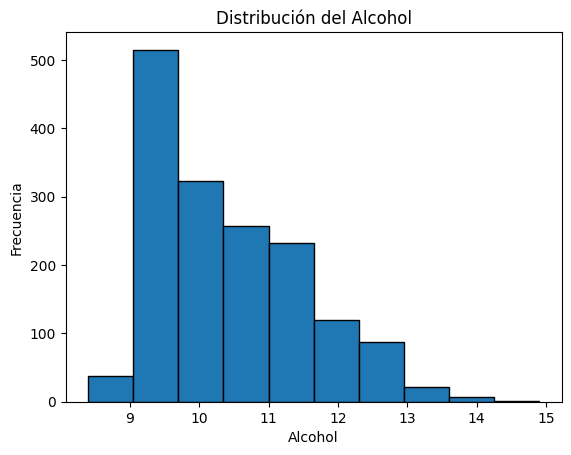

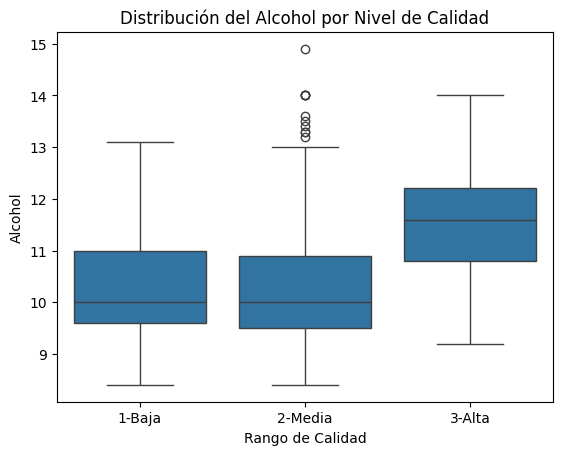

In [99]:
import matplotlib.pyplot as plt

plt.hist(df['Alcohol'], bins=10, edgecolor='black')
plt.title('Distribución del Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()

sns.boxplot(x='Rango de Calidad', y='Alcohol', data=df)
plt.title('Distribución del Alcohol por Nivel de Calidad')
plt.show()

# Conclusiones Hipotesis 2

Se puede observar que la mayoría de los vinos tienen un contenido de alcohol entre 9 y 12 grados, siendo el rango más común entre 9.5 y 10.5 grados.
Hay pocos vinos con muy bajo contenido de alcohol (menos de 9 grados) y pocos con muy alto contenido (más de 13 grados).
Los vinos de calidad Alta (7 y 8) tienden a tener un contenido de alcohol un poco más alto que los vinos de menor calidad (5 y 6).
A medida que aumenta la calidad del vino se observa un aumento en el contenido de alcohol, por lo cual podriamos indicar que la hipotesis esta confirmada,
aunque tambien se ve una presencia bastante distribuida en el resto de niveles de calidad, lo que indica que el contenido de alcohol no es el único factor determinante de la calidad.

# Hipótesis 3

"La relación entre el contenido de alcohol y la calidad del vino se ve afectada por el nivel de acidez volátil y el contenido de sulfatos"

Vamos a crear un gráfico de dispersión 3D, donde cada eje represente una de las variables (alcohol, acidez volátil y sulfatos)
y el color o tamaño de los puntos indique la calidad del vino.

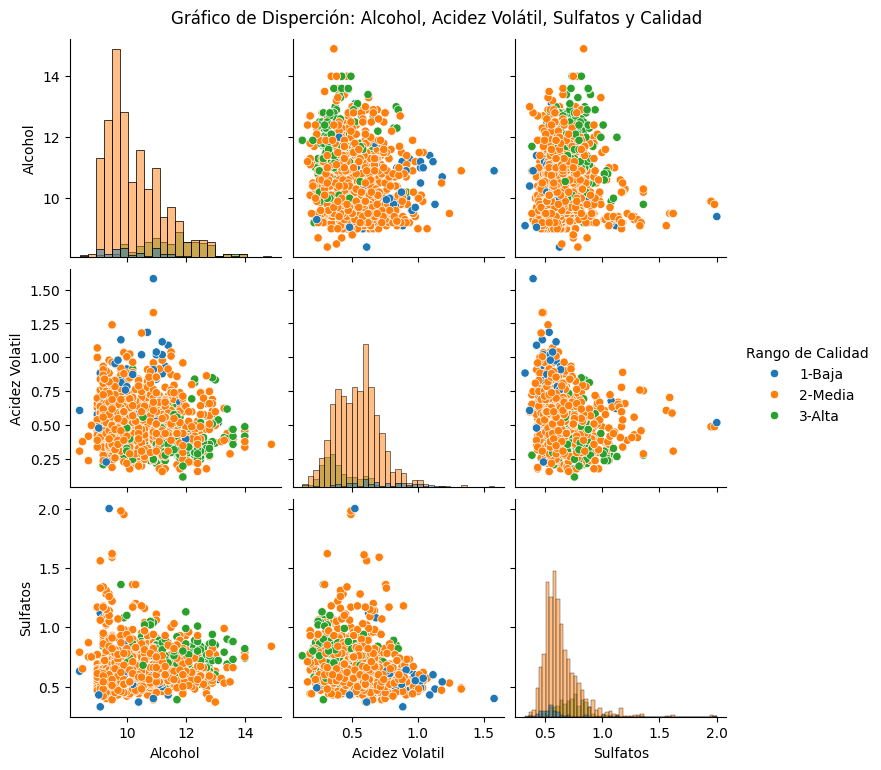

In [100]:
columns_of_interest = ['Alcohol', 'Acidez Volatil', 'Sulfatos', 'Rango de Calidad']
df_filtered = df[columns_of_interest]
sns.pairplot(df_filtered, hue='Rango de Calidad', diag_kind='hist', kind='scatter', palette='tab10')
plt.suptitle('Gráfico de Disperción: Alcohol, Acidez Volátil, Sulfatos y Calidad', y=1.02)
plt.show()

# Conclusiones Hipotesis 3

Podemos analizar algunos puntos a tener en cuenta segun las graficas:
Alcohol vs. Calidad: Tendencia positiva general entre alcohol y calidad, pero esta tendencia parece ser más fuerte para vinos con menor acidez volátil.
Esto sugiere que la acidez volátil podría estar moderando la relación entre alcohol y calidad.

Alcohol vs. Acidez Volátil: relación negativa entre alcohol y acidez volátil, especialmente para vinos de mayor calidad.
Esto indica que los vinos de alta calidad tienden a tener un alto contenido de alcohol y una baja acidez volátil.

Alcohol vs. Sulfatos: No se observa una relación clara entre alcohol y sulfatos, estas variables podrían ser independientes en relación a la calidad.

Acidez Volátil vs. Sulfatos: ligera tendencia negativa, lo que sugiere que los vinos con mayor acidez volátil tienden a tener menor contenido de sulfatos.

En base a los comentado anteriormente, la hipótesis de que la relación entre el contenido de alcohol y la calidad del vino se ve afectada por el nivel de acidez volátil se puede confirmar, los vinos con mayor contenido de alcohol y menor acidez volátil tienden a tener una calidad superior.
Sin embargo, la influencia de los sulfatos en esta relación no es tan clara para ser determinante.

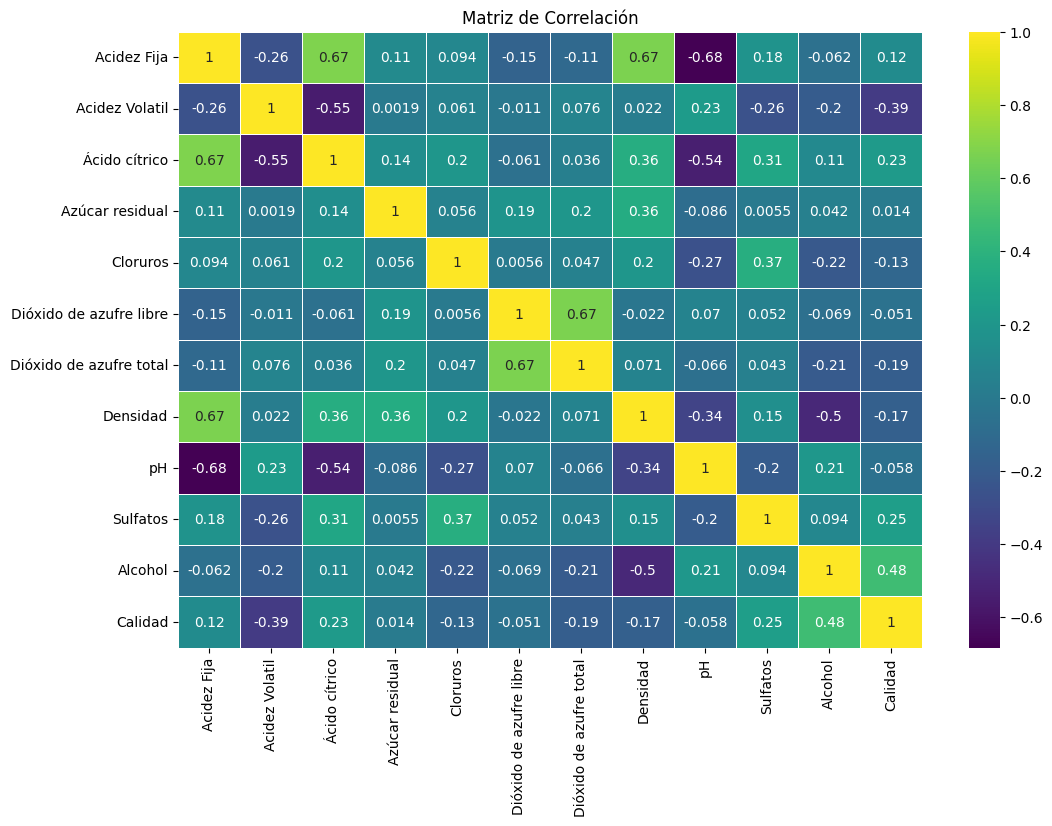

In [101]:
#Gráfico de correlaciones

plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['Rango de Calidad']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linecolor='white', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.grid(False)
plt.show()


# Conclusiones

Correlaciones con la Calidad:

Positivas:
Alcohol (0.476): Los vinos con mayor contenido de alcohol tienden a tener una mejor calidad.
Sulfatos (0.251): Los vinos con mayor contenido de sulfatos tienden a tener una mejor calidad.
Ácido Cítrico (0.226): Los vinos con mayor contenido de ácido cítrico tienden a tener una mejor calidad.

Negativas:
Acidez Volátil (-0.391): Los vinos con mayor acidez volátil tienden a tener una peor calidad.
Dióxido de Azufre Total (-0.185): Los vinos con mayor dióxido de azufre total tienden a tener una peor calidad.
Densidad (-0.175): Los vinos más densos tienden a tener una peor calidad.

Correlaciones Positivas Fuertes:
pH y Acidez Fija (0.683): A medida que aumenta el pH (el vino se vuelve menos ácido), la acidez fija también tiende a aumentar.
Acidez Fija y Ácido Cítrico (0.672): Los vinos con mayor acidez fija tienden a tener también mayor contenido de ácido cítrico.

Correlaciones Negativas Fuertes:
Acidez Volátil y Ácido Cítrico (-0.552): Los vinos con mayor acidez volátil tienden a tener menor contenido de ácido cítrico.